<a href="https://colab.research.google.com/github/Naveensadanandan/Food_classifier_dcnn/blob/master/04_Custom_datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_etc"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi_etc.zip", "wb") as f:
        request = requests.get("https://github.com/Naveensadanandan/Pytorch/raw/master/pizza_steak_sushi_30_percent.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi_etc.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_etc directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_etc'.
There are 5 directories and 0 images in 'data/pizza_steak_sushi_etc/test'.
There are 0 directories and 83 images in 'data/pizza_steak_sushi_etc/test/pizza'.
There are 0 directories and 82 images in 'data/pizza_steak_sushi_etc/test/apple_pie'.
There are 0 directories and 68 images in 'data/pizza_steak_sushi_etc/test/chicken_wings'.
There are 0 directories and 68 images in 'data/pizza_steak_sushi_etc/test/sushi'.
There are 0 directories and 74 images in 'data/pizza_steak_sushi_etc/test/steak'.
There are 5 directories and 0 images in 'data/pizza_steak_sushi_etc/train'.
There are 0 directories and 216 images in 'data/pizza_steak_sushi_etc/train/pizza'.
There are 0 directories and 225 images in 'data/pizza_steak_sushi_etc/train/apple_pie'.
There are 0 directories and 248 images in 'data/pizza_steak_sushi_etc/train/chicken_wings'.
There are 0 directories and 199 images in 'data/pizza_steak_sushi_etc/train/sushi'.
There are

### setting up train and test directories path

---



In [ ]:
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(PosixPath('data/pizza_steak_sushi_etc/train'),
 PosixPath('data/pizza_steak_sushi_etc/test'))

# Visulaizing random images using PIL

sushi
random image height : 512
random image width : 512


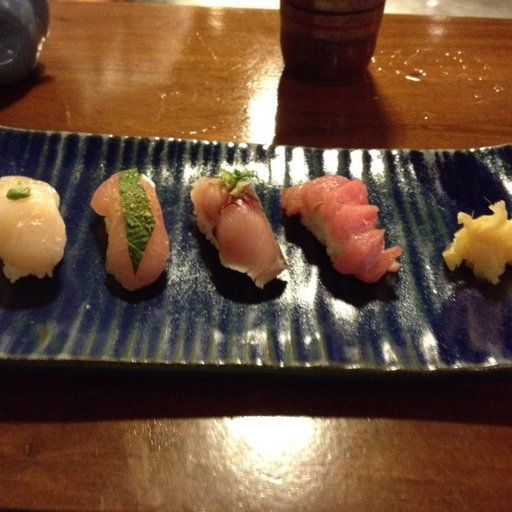

In [ ]:
import random
from PIL import Image

image_paths = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_paths)

random_image_label = random_image_path.parent.stem

img = Image.open(random_image_path)

print(random_image_label)
print(f"random image height : {img.height}")
print(f"random image width : {img.width}")
img

# Visulazing random images using matplotlib

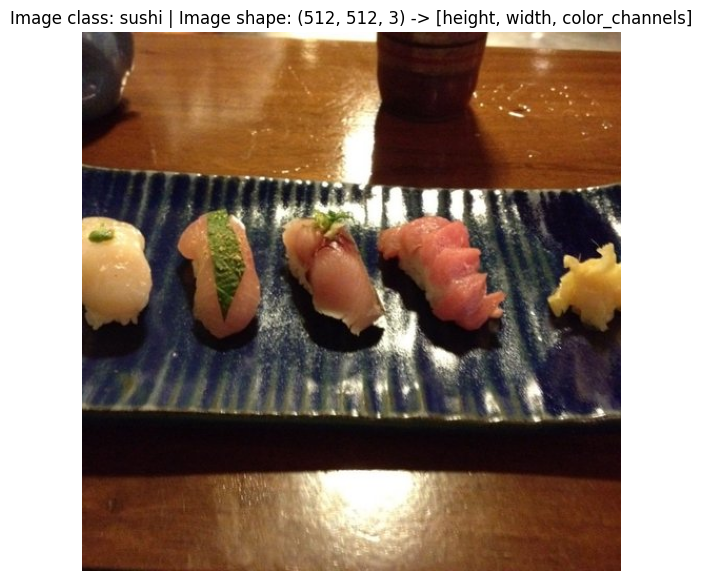

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_label} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# Transfroming data using torch.utils.data transforms

In [ ]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [ ]:
# data_transform = transforms.Compose([
#     transforms.Resize(size=(64,64)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.ToTensor()]
# )

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [ ]:
np.asarray(img).shape

(512, 512, 3)

In [ ]:
data_transform(img).shape

torch.Size([3, 128, 128])

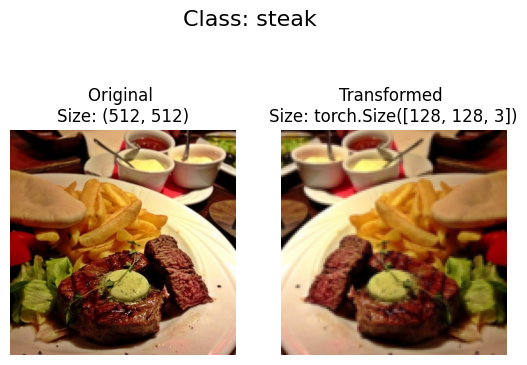

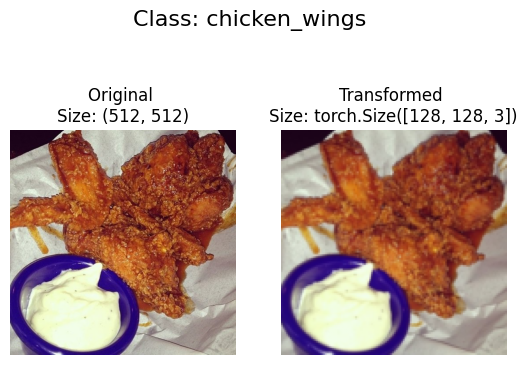

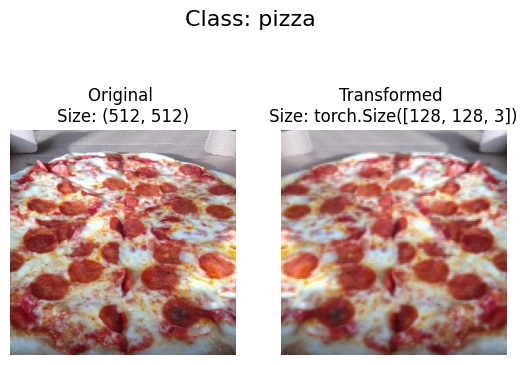

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths,
                        transform=data_transform,
                        n=3)

# Using ImageFolder for creating datasets that can be used for model

In [ ]:
train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_path,
                                 transform = data_transform)
print(f"train data : \n{train_data}\ntest_data\n{test_data}")

train data : 
Dataset ImageFolder
    Number of datapoints: 1125
    Root location: data/pizza_steak_sushi_etc/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test_data
Dataset ImageFolder
    Number of datapoints: 375
    Root location: data/pizza_steak_sushi_etc/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
classes = train_data.classes
classes

['apple_pie', 'chicken_wings', 'pizza', 'steak', 'sushi']

In [ ]:
classes_dict = train_data.class_to_idx
classes_dict

{'apple_pie': 0, 'chicken_wings': 1, 'pizza': 2, 'steak': 3, 'sushi': 4}

# Creating dataloaders

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 1,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 1,
                              shuffle = False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7970b5cf3970>,
 <torch.utils.data.dataloader.DataLoader at 0x7970b5cf0880>)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"shape of image : {img.shape}")
print(f"label of the image : {label}")

shape of image : torch.Size([1, 3, 128, 128])
label of the image : tensor([4])


# creating a model 0 with out data augmentation

In [ ]:
# simple_transform = transforms.Compose([
#     transforms.Resize(size = (64,64)),
#     transforms.ToTensor()
# ])

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size = (128,128)),
    transforms.ToTensor()
])

In [ ]:
#loading and transforming data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_path, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_path, transform = simple_transform)

from torch.utils.data import dataloader
import os

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=BATCH_SIZE, shuffle = True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE, shuffle = False, num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7970b5b1bc10>,
 <torch.utils.data.dataloader.DataLoader at 0x7970b5cbfca0>)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn
class FoodFinder(nn.Module):
  def __init__(self,input_size:int, hidden:int, output_size:int, *args, **kwargs) -> None:
     super().__init__(*args, **kwargs)
     self.conv_layer1 = nn.Sequential(
         nn.Conv2d(in_channels=input_size,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,stride=2)
         )
     self.conv_layer2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2),
         nn.Dropout(p=0.2)
         )
     self.linear_layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden*32*32,
                      out_features=output_size)
     )

  def forward(self, x:torch.tensor):
    # x = self.conv_layer1(x)
    # print(x.shape)
    # x = self.conv_layer2(x)
    # print(x.shape)
    # x = self.linear_layer(x)
    # print(x.shape)
    # return x
    return self.linear_layer(self.conv_layer2(self.conv_layer1(x)))

torch.manual_seed(42)
model_0 = FoodFinder(input_size = 3,
                     hidden = 10,
                     output_size = len(train_data.classes)).to(device)
model_0

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=5, bias=True)
  )
)

In [ ]:
# torch.manual_seed(42)
# images = torch.randn(size = (32,3,64,64))
# img = images[0]
# img.shape

In [ ]:
torch.manual_seed(42)
images = torch.randn(size = (32,3,128,128))
img = images[0]
img.shape

torch.Size([3, 128, 128])

In [ ]:
model_0(images.to(device)).shape

torch.Size([32, 5])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [ ]:
img, label = next(iter(train_dataloader_simple))
img = img.to(device)
label = label.to(device)
img.shape,label.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [ ]:
#checking loss function
y_pred = model_0(img)
y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
loss = loss_fn(y_pred,label)
loss.item()

1.6273882389068604

In [ ]:
# checking accuracy function
accuracy = (y_pred_class == label).sum().item()/len(label)
accuracy

0.0625

In [ ]:
#Creating a training and testing function
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0 , 0

  for batch , (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #Forward pass
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = FoodFinder(input_size=3, # number of color channels (3 for RGB)
                  hidden=12,
                  output_size=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6256 | train_acc: 0.2069 | test_loss: 1.6155 | test_acc: 0.1771
Epoch: 2 | train_loss: 1.6034 | train_acc: 0.2031 | test_loss: 1.5944 | test_acc: 0.2344
Epoch: 3 | train_loss: 1.5555 | train_acc: 0.2747 | test_loss: 1.5278 | test_acc: 0.2823
Epoch: 4 | train_loss: 1.4331 | train_acc: 0.3630 | test_loss: 1.5224 | test_acc: 0.3057
Epoch: 5 | train_loss: 1.4098 | train_acc: 0.3852 | test_loss: 1.4912 | test_acc: 0.3250
Total training time: 24.637 seconds


In [ ]:
def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

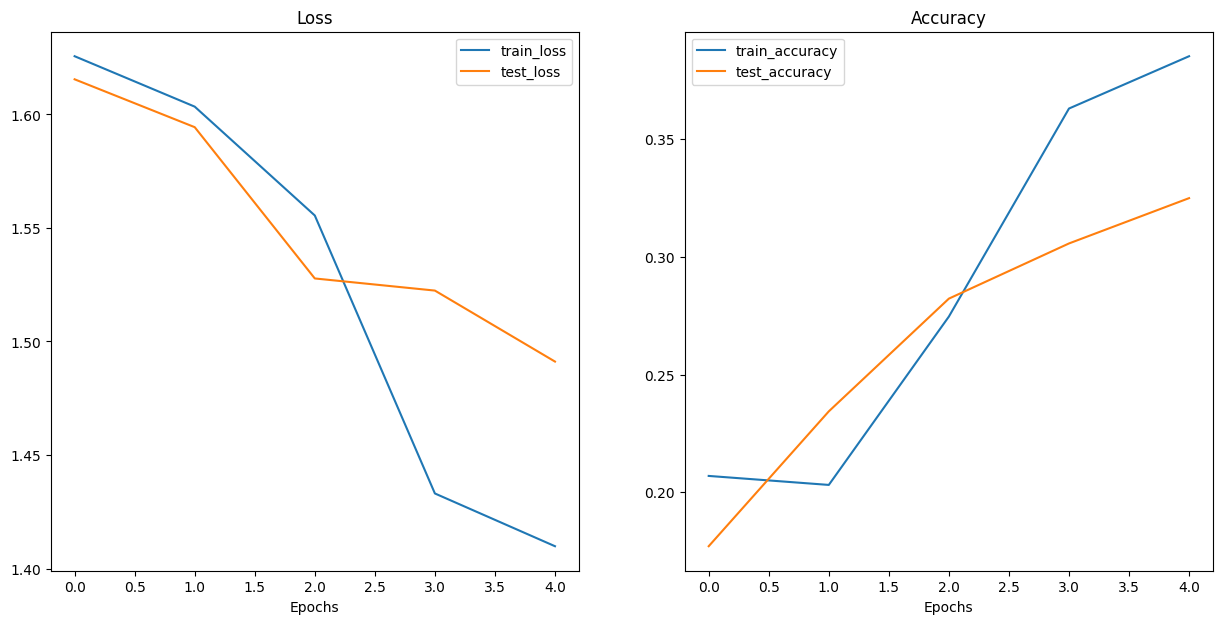

In [ ]:
plot_loss_curves(model_0_results)

# model_1 with data Augmentation

In [ ]:
#creating train and test transforms
from torchvision.transforms import v2
train_transform_aug = transforms.Compose([
    transforms.Resize(size = (128,128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size = (128,128)),
    transforms.ToTensor()
])

In [ ]:
# Turning image folders into datasets
train_data_aug = datasets.ImageFolder(
    root = train_path,
    transform=train_transform_aug,
    )
test_data = datasets.ImageFolder(
    root = test_path,
    transform=test_transform_simple
)
train_data_aug,test_data

(Dataset ImageFolder
     Number of datapoints: 1125
     Root location: data/pizza_steak_sushi_etc/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 375
     Root location: data/pizza_steak_sushi_etc/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
#creating train and test dataloaders
import os
NUM_OF_WORKERS = os.cpu_count()
BATCH_SIZE = 32

train_dataloader_aug = DataLoader(
    dataset = train_data_aug,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=True
)
test_dataloader_simple = DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=False
)

In [ ]:
# torch.manual_seed(42)
# model_1 = FoodFinder(
#     input_size=3,
#     hidden = 16,
#     output_size=len(train_data_aug.classes)).to(device)
# model_1

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=5, bias=True)
  )
)

In [ ]:
from torchvision import models
model_1 = models.resnet50(pretrained=True)

# Modify the final fully connected layer to match the number of classes in your dataset
num_classes = 5  # Change this to the number of classes in your dataset
model_1.fc = nn.Linear(in_features=model_1.fc.in_features, out_features=num_classes)
model_1.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
#training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_aug,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4639 | train_acc: 0.4399 | test_loss: 2.9027 | test_acc: 0.4166
Epoch: 2 | train_loss: 1.1463 | train_acc: 0.5818 | test_loss: 1.1677 | test_acc: 0.6256
Epoch: 3 | train_loss: 1.1792 | train_acc: 0.5575 | test_loss: 1.6706 | test_acc: 0.5676
Epoch: 4 | train_loss: 1.0692 | train_acc: 0.6108 | test_loss: 1.2304 | test_acc: 0.6205
Epoch: 5 | train_loss: 0.8662 | train_acc: 0.6812 | test_loss: 1.0750 | test_acc: 0.6644
Epoch: 6 | train_loss: 0.7409 | train_acc: 0.7372 | test_loss: 1.3670 | test_acc: 0.6013
Epoch: 7 | train_loss: 0.7687 | train_acc: 0.7366 | test_loss: 0.9271 | test_acc: 0.6820
Epoch: 8 | train_loss: 0.7030 | train_acc: 0.7354 | test_loss: 1.1956 | test_acc: 0.6382
Epoch: 9 | train_loss: 0.7293 | train_acc: 0.7351 | test_loss: 0.8385 | test_acc: 0.6976
Epoch: 10 | train_loss: 0.6386 | train_acc: 0.7804 | test_loss: 1.1772 | test_acc: 0.6538
Epoch: 11 | train_loss: 0.5710 | train_acc: 0.8035 | test_loss: 0.8120 | test_acc: 0.7330
Epoch: 12 | train_l

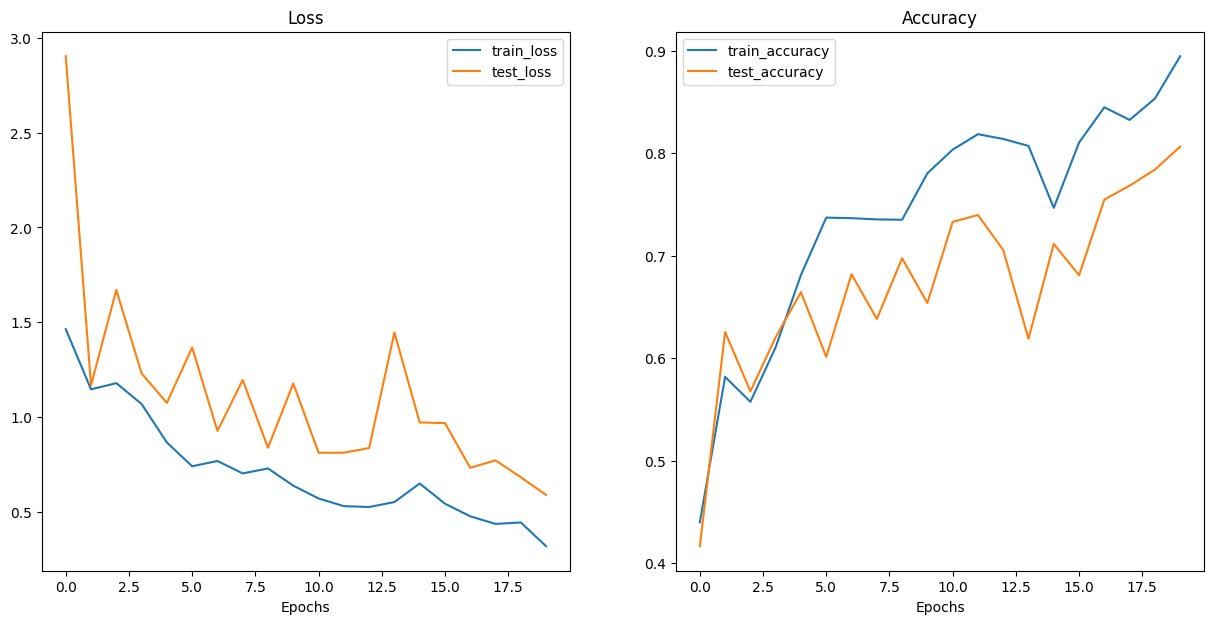

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path_1 = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path_1.is_file():
    with open(custom_image_path_1, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path_1}...")
        f.write(request.content)
else:
    print(f"{custom_image_path_1} already exists, skipping download.")

data/04-pizza-dad.jpeg already exists, skipping download.


In [ ]:
import requests
from pathlib import Path

# Define the data path where the image will be stored
data_path = Path('./data')  # Adjust the path as needed
data_path.mkdir(parents=True, exist_ok=True)

# Setup custom image path
custom_image_path_2 = data_path / "04-sushi.jpeg"

# URL for the raw image file from the GitHub repository
image_url = "https://raw.githubusercontent.com/Naveensadanandan/Pytorch/main/sushi-2853382_640.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path_2.is_file():
    print(f"Downloading {custom_image_path_2}...")
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Check if the request was successful
        with open(custom_image_path_2, "wb") as f:
            f.write(response.content)
        print(f"Image downloaded successfully: {custom_image_path_2}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the image: {e}")
else:
    print(f"{custom_image_path_2} already exists, skipping download.")


data/04-sushi.jpeg already exists, skipping download.


In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
])
class_names = train_data.classes
class_names

['apple_pie', 'chicken_wings', 'pizza', 'steak', 'sushi']

In [ ]:
import torchvision
def pred_plot(model:torch.nn.Module,
              image_path:str,
              class_names:list[str],
              transform=None,
              device=device):
  target_image = torchvision.io.read_image(str(image_path))

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target = target_image.unsqueeze(dim=0)
    y_pred = model(target.to(device))

  y_probs = torch.softmax(y_pred,dim=1)
  y_label = torch.argmax(y_probs,dim=1)
  plt.imshow(target_image.permute(1,2,0))
  if class_names:
    title = f"prediction : {class_names[y_label.cpu()]} | probability : {y_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {y_label.item()} | Prob: {y_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False);


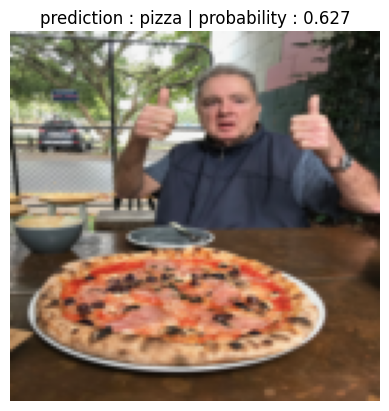

In [ ]:
pred_plot(model = model_1,
          image_path=custom_image_path_1,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

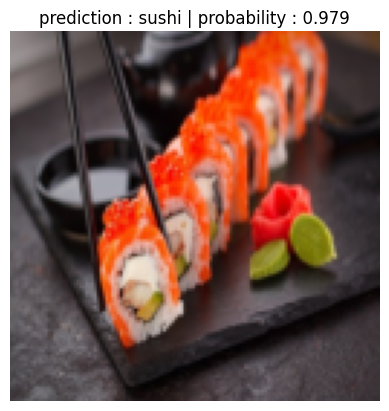

In [ ]:
pred_plot(model = model_1,
          image_path=custom_image_path_2,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

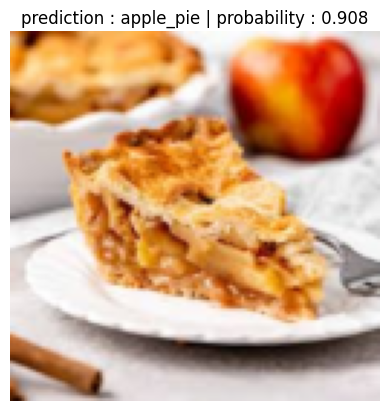

In [ ]:
pred_plot(model = model_1,
          image_path="data/pie.jpeg",
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

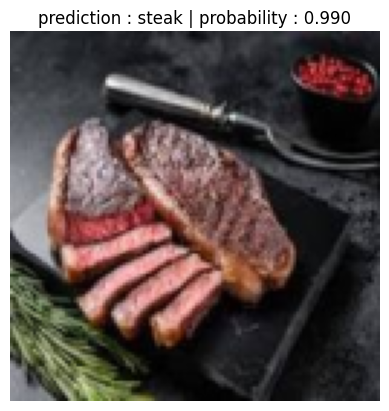

In [ ]:
pred_plot(model = model_1,
          image_path="data/steak.jpeg",
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

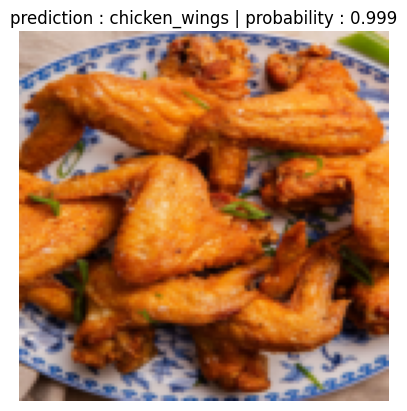

In [ ]:
pred_plot(model = model_1,
          image_path="data/chick2.jpg",
          class_names=class_names,
          transform=custom_image_transform,
          device=device)

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "five_foods_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/five_foods_model.pth


In [ ]:
# # Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# # Note: loading model will error if the shapes here aren't the same as the saved version
# loaded_model_2 = FoodFinder(input_size=3,
#                                     hidden=12, # try changing this to 128 and seeing what happens
#                                     output_size=5)

# # Load in the saved state_dict()
# loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# # Send model to GPU
# loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Define the model architecture
num_classes = 5  # Number of classes in your dataset
loaded_model = models.resnet50(pretrained=False)  # Load ResNet-50 without pre-trained weights

# Modify the final fully connected layer to match the number of classes
loaded_model.fc = nn.Linear(in_features=loaded_model.fc.in_features, out_features=num_classes)

# Load the saved model weights
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-180-a3ed3d9b7232>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

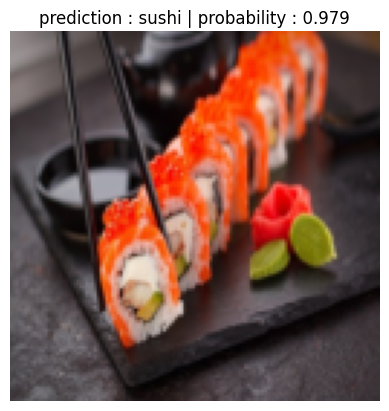

In [ ]:
pred_plot(model = loaded_model,
          image_path=custom_image_path_2,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)